# Semianr 8 - Applied Quantitative Logistics

In [33]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Traveling Salesman Problem

In [34]:
# list(np.random.permutation(15))

In [35]:
print(list(np.random.randint(0, 1000, 100)))

[772, 956, 96, 54, 982, 51, 355, 115, 620, 768, 564, 903, 235, 858, 496, 850, 756, 267, 86, 447, 32, 786, 928, 494, 943, 453, 801, 262, 755, 241, 490, 823, 649, 462, 841, 102, 413, 864, 810, 243, 788, 52, 372, 437, 572, 518, 980, 794, 609, 53, 466, 44, 530, 197, 597, 148, 885, 335, 360, 148, 54, 363, 930, 918, 179, 193, 850, 992, 208, 149, 802, 181, 660, 619, 673, 917, 527, 609, 174, 727, 769, 825, 791, 834, 889, 558, 874, 475, 328, 443, 352, 273, 139, 565, 754, 83, 961, 578, 746, 750]


In [36]:
print(list(np.random.randint(0, 1000, 100)))

[937, 49, 904, 76, 215, 646, 98, 107, 436, 238, 691, 12, 92, 244, 944, 378, 678, 802, 622, 390, 175, 701, 560, 326, 216, 256, 758, 99, 634, 50, 379, 747, 148, 145, 787, 389, 61, 835, 45, 278, 746, 310, 446, 282, 695, 406, 27, 70, 29, 485, 779, 41, 903, 356, 540, 613, 369, 240, 169, 470, 269, 173, 912, 387, 898, 624, 240, 114, 505, 810, 394, 487, 36, 9, 306, 659, 900, 525, 321, 612, 985, 589, 158, 707, 205, 588, 240, 976, 298, 18, 598, 807, 674, 709, 712, 690, 618, 469, 171, 632]


In [37]:
def tsp():
    
#     x = [24, 74, 83, 53, 7, 96, 10, 33, 53, 92, 13, 35, 97, 90, 97]
#     y = [77, 91, 60, 4, 93, 18, 18, 20, 89, 79, 62, 32, 65, 11, 62]
    x = [829, 550, 451, 614, 419, 471, 246, 987, 678, 647, 234, 412, 45, 575, 758, 434, 199, 617, 52, 555, 108, 513, 264, 198, 647, 522, 137, 445, 363, 518, 751, 554, 532, 914, 890, 591, 612, 878, 714, 713, 953, 533, 254, 740, 208, 355, 935, 440, 149, 843, 388, 402, 505, 40, 382, 505, 337, 496, 435, 513, 387, 438, 512, 249, 911, 912, 410, 762, 272, 822, 310, 801, 661, 659, 6, 205, 673, 522, 602, 752, 413, 747, 25, 926, 959, 565, 787, 76, 845, 976, 989, 593, 556, 990, 231, 38, 658, 697, 798, 690]
    y = [108, 455, 254, 250, 576, 229, 468, 14, 601, 822, 486, 28, 811, 833, 436, 844, 228, 257, 909, 7, 193, 132, 80, 182, 468, 512, 929, 134, 56, 448, 172, 383, 353, 213, 852, 989, 986, 720, 965, 452, 864, 692, 617, 71, 140, 36, 936, 40, 777, 975, 554, 985, 740, 443, 161, 953, 894, 994, 629, 397, 153, 41, 769, 602, 864, 507, 658, 251, 631, 132, 351, 160, 560, 992, 900, 120, 802, 798, 481, 246, 36, 712, 99, 64, 204, 925, 330, 780, 113, 671, 981, 283, 251, 599, 410, 386, 380, 919, 854, 730]
    
    n = len(x)
    
    d = np.zeros([n, n])
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            d[i][j] = math.sqrt((x[i] - x[j])**2 + (y[i]-y[j])**2)
            d[j][i] = d[i][j]
            
    xmin = 0
    xmax = 100
    
    ymin = 0
    ymax = 100
    
    model = {'n': n,
            'x': x,
            'y': y,
            'd': d,
            'xmin': xmin,
            'xmax': xmax,
            'ymin': ymin,
            'ymax': ymax}
        
    return model

In [38]:
# model = tsp()

### Create Random Solution

In [39]:
def createRandomSolution(model):
    n = model['n']
    sol = list(np.random.permutation(n))
    return sol

### Calculating the Length - Cost Function

In [40]:
def TourLength(tour, model):
    n = model['n']
    length = tour.copy()
    length.append(tour[0])
    
    L = 0
    
    for k in range(0, n):
        i = length[k]
        j = length[k+1]
        
        L = L + model['d'][i][j]

    
    return L

### Roullete Wheele Selection

In [41]:
def rouletteWheelSelection(p):
    r = random.random()
    
    c = np.cumsum(p)
    
    indexes = [
        index for index in range(len(c))
        if c[index] > r
    ]
    
    return indexes[0]

### Mutation

In [42]:
def ApplySwap(tour1):
    
    n = model['n']
    I = random.sample(range(0, n-1), 2)
    
    i1 = I[0]
    i2 = I[1]
    
    tour2 = tour1.copy()
    tour2[i1] = tour1[i2]
    tour2[i2] = tour1[i1]
    
    return tour2

# ------------------------------------------------------

def ApplyReversion(tour1):
    
    n = model['n']
    I = random.sample(range(0,n-1), 2)
    
    i1 = min(I)
    i2 = max(I)
    
    tour2 = tour1.copy()
    
    tour2[i1:i2] = tour2[i1:i2][::-1]
    
    return tour2

# ------------------------------------------------------

def ApplyInsertion(tour1):
    
    n = model['n']
    I = random.sample(range(0, n-1), 2)
    
    i1 = I[0]
    i2 = I[1]
    
    tour2 = tour1.copy()
    
    if i1<i2:
        tour2.insert(i2+1, tour2[i1])
        tour2.pop(i1)
    else:
        tour2.insert(i2+1, tour2[i1])
        tour2.pop(i1+1)
    return tour2

# ------------------------------------------------------

def CreateNeighbor(tour1):
    pSwap = 0.2
    pReversion = 0.5
    pInsertion = 1 - pSwap - pReversion
    
    p = [pSwap, pReversion, pInsertion]
    
    METHOD = rouletteWheelSelection(p)
    
    if METHOD == 0:
        tour2 = ApplySwap(tour1)
    elif METHOD == 1:
        tour2 = ApplyReversion(tour1)
    elif METHOD == 2:
        tour2 = ApplyInsertion(tour1)
        
    return tour2

## Simmulated Annealing (SA)

In [43]:
### Problem Definition -------------------------------------
model = tsp()

### SA Parameters ------------------------------------
maxIt = 10000    # maximum number of iteration
T0 = 100       # initial temprature
alpha = 0.99   # temprature reduction rate


def SA(model, maxIt, T0, alpha):
    ### Initialization -------------------------------
    sol = createRandomSolution(model)
    cost = TourLength(sol, model)

    BestSol = sol
    BestCost = cost

    BestCost_list = np.zeros(maxIt)     # Array to hold the best results

    T = T0

    for it in range(1, maxIt+1):
        newsol = CreateNeighbor(sol)
        newcost = TourLength(newsol, model)
        
        if newcost <= cost:     # If NEWSOL is better than SOL
            sol = newsol
            cost = newcost
            
        else:                   # If NEWSOL is NOT better than SOL
            DELTA = newcost - cost
            P = math.exp(-DELTA/T)
            
            r = np.random.random()
            
            if P >= r:
                sol = newsol
                cost = newcost
                
        if cost <= BestCost:
            BestSol = sol
            BestCost = cost
            
        BestCost_list[it-1] = TourLength(BestSol, model)

        # Update Temprature
        T = alpha*T
        
        # Display Iteration Information
        if it % 500 == 0: 
            print(f'Iteration: {it}, BestCost = {BestCost_list[it-1]}')

    return BestSol, BestCost_list
    
    

In [44]:
BestSol1, BestCost_list = SA(model, maxIt, T0, alpha)

Iteration: 500, BestCost = 26911.02185010819
Iteration: 1000, BestCost = 22546.10897373236
Iteration: 1500, BestCost = 18900.38205001101
Iteration: 2000, BestCost = 17708.392221899547
Iteration: 2500, BestCost = 16311.32655070453
Iteration: 3000, BestCost = 15381.110325415862
Iteration: 3500, BestCost = 15123.73569671031
Iteration: 4000, BestCost = 14694.506654453506
Iteration: 4500, BestCost = 14256.408986355313
Iteration: 5000, BestCost = 14104.035786327473
Iteration: 5500, BestCost = 13422.812751243911
Iteration: 6000, BestCost = 12667.02665801716
Iteration: 6500, BestCost = 12253.102564455112
Iteration: 7000, BestCost = 11658.297902843817
Iteration: 7500, BestCost = 11410.035555839042
Iteration: 8000, BestCost = 11328.69804076374
Iteration: 8500, BestCost = 11117.28033937808
Iteration: 9000, BestCost = 10907.330986164456
Iteration: 9500, BestCost = 10636.622646694886
Iteration: 10000, BestCost = 10557.43216783625


### Results

Text(0, 0.5, 'Best Cost')

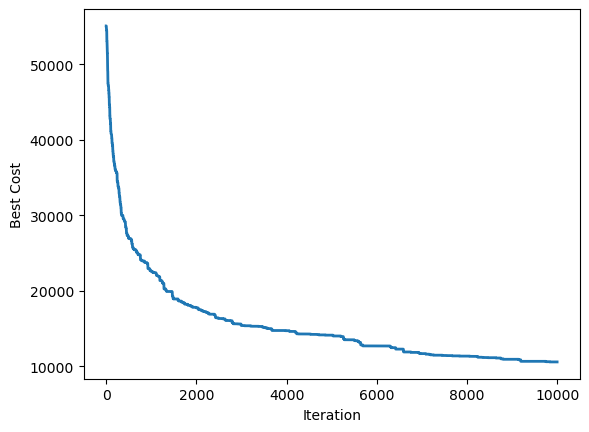

In [45]:
# Plot the result
plt.plot(BestCost_list, linewidth = 2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

# HW5 - Applied Quantitative Logistics

   1) Implement crossover PMX for Genetic Algorithm which is presented in the paper [Genetic Algorithm Solution of the TSP Avoiding Special Crossover and Mutation](https://user.ceng.metu.edu.tr/~ucoluk/research/publications/tspnew.pdf)

   2) Compaire Simmulated Anneling with Genetic Algorithm for TSP problem (Better to investigate with different parameters to find proper parameters for the current problem)

   3) Draw the results on the same plot.

   4) Explain your analysis and conclusion based on your experiment.

Instruction for submission:

- Please submit your solutions in (.ipynb) format to my email (msohrabi@hse.ru).

- Deadline: **April 20, 2023, 11:59 pm.**

- The subject of the email and file name: **[HW5_AQL]-YOUR_NAME**

In [46]:
### Problem Definition -------------------------------------
model = tsp()

### SA Parameters ------------------------------------
maxIt = 10000   # maximum number of iteration
T0 = 1000      # initial temprature
alpha = 0.96  # temprature reduction rate

BestSol1, BestCost_list1 = SA(model, maxIt, T0, alpha)

Iteration: 500, BestCost = 28589.78136383617
Iteration: 1000, BestCost = 21607.682433387163
Iteration: 1500, BestCost = 18171.557419656583
Iteration: 2000, BestCost = 16512.040033903428
Iteration: 2500, BestCost = 15365.452142349395
Iteration: 3000, BestCost = 14027.898484115633
Iteration: 3500, BestCost = 13313.68865563482
Iteration: 4000, BestCost = 12911.601485682635
Iteration: 4500, BestCost = 12040.364331307224
Iteration: 5000, BestCost = 11877.364379696548
Iteration: 5500, BestCost = 11690.502161238981
Iteration: 6000, BestCost = 11419.6118539616
Iteration: 6500, BestCost = 10910.859996004445
Iteration: 7000, BestCost = 10784.59488652004
Iteration: 7500, BestCost = 10730.314009145626
Iteration: 8000, BestCost = 10520.002164866823
Iteration: 8500, BestCost = 10500.047605855834
Iteration: 9000, BestCost = 10391.650678911206
Iteration: 9500, BestCost = 10164.553993533496
Iteration: 10000, BestCost = 9869.444577929582


Text(0, 0.5, 'Best Cost')

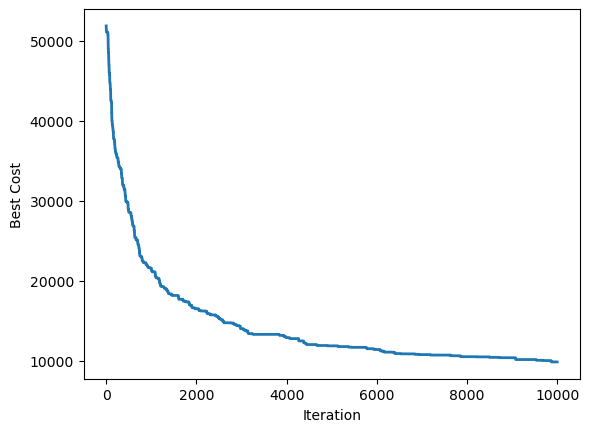

In [47]:
# Plot the result
plt.plot(BestCost_list1, linewidth = 2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

In [48]:
### Problem Definition -------------------------------------
model = tsp()

### SA Parameters ------------------------------------
maxIt = 30000   # maximum number of iteration
T0 = 1000      # initial temprature
alpha = 0.99  # temprature reduction rate


BestSol1, BestCost_list2 = SA(model, maxIt, T0, alpha)


Iteration: 500, BestCost = 27444.06439686918
Iteration: 1000, BestCost = 21746.103314513304
Iteration: 1500, BestCost = 18549.463620996834
Iteration: 2000, BestCost = 17062.317167236666
Iteration: 2500, BestCost = 15686.147494366542
Iteration: 3000, BestCost = 14690.440573709486
Iteration: 3500, BestCost = 13575.630871556663
Iteration: 4000, BestCost = 12972.047613370096
Iteration: 4500, BestCost = 12115.210435071915
Iteration: 5000, BestCost = 11163.643674730638
Iteration: 5500, BestCost = 10768.999965477895
Iteration: 6000, BestCost = 10579.466723642143
Iteration: 6500, BestCost = 10178.520703747374
Iteration: 7000, BestCost = 10065.512802227611
Iteration: 7500, BestCost = 9900.46774134166
Iteration: 8000, BestCost = 9796.59043931903
Iteration: 8500, BestCost = 9750.192352976132
Iteration: 9000, BestCost = 9750.192352976132
Iteration: 9500, BestCost = 9381.188954189096
Iteration: 10000, BestCost = 9332.968848324372
Iteration: 10500, BestCost = 9316.383842214245
Iteration: 11000, Best

Text(0, 0.5, 'Best Cost')

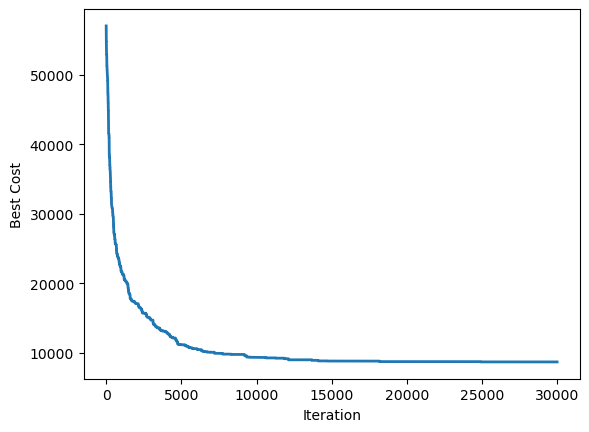

In [49]:
# Plot the result
plt.plot(BestCost_list2, linewidth = 2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

In [50]:
### Problem Definition -------------------------------------
model = tsp()

### SA Parameters ------------------------------------
maxIt = 30000   # maximum number of iteration
T0 = 100      # initial temprature
alpha = 0.99  # temprature reduction rate


BestSol1, BestCost_list3 = SA(model, maxIt, T0, alpha)


Iteration: 500, BestCost = 24859.27113201223
Iteration: 1000, BestCost = 20565.99233746348
Iteration: 1500, BestCost = 18912.154533774865
Iteration: 2000, BestCost = 17531.30975649972
Iteration: 2500, BestCost = 15350.664548279317
Iteration: 3000, BestCost = 14621.99080820278
Iteration: 3500, BestCost = 14118.39890943453
Iteration: 4000, BestCost = 13250.046080569522
Iteration: 4500, BestCost = 12655.22716451449
Iteration: 5000, BestCost = 12396.55068118189
Iteration: 5500, BestCost = 12270.803163926268
Iteration: 6000, BestCost = 11497.299512696307
Iteration: 6500, BestCost = 11420.162984907838
Iteration: 7000, BestCost = 10981.888933850025
Iteration: 7500, BestCost = 10880.235566469279
Iteration: 8000, BestCost = 10589.712734063807
Iteration: 8500, BestCost = 10214.22192306987
Iteration: 9000, BestCost = 10159.041944976974
Iteration: 9500, BestCost = 9993.440033139763
Iteration: 10000, BestCost = 9737.13921026875
Iteration: 10500, BestCost = 9511.17031539872
Iteration: 11000, BestCos

Text(0, 0.5, 'Best Cost')

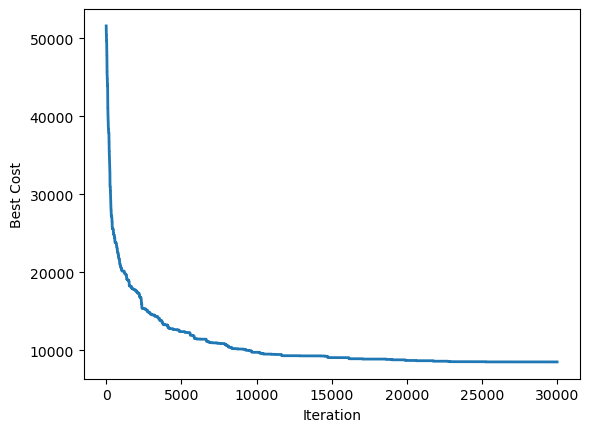

In [51]:
# Plot the result
plt.plot(BestCost_list3, linewidth = 2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

In [52]:
### Problem Definition -------------------------------------
model = tsp()

### SA Parameters ------------------------------------
maxIt = 50000   # maximum number of iteration
T0 = 1000     # initial temprature
alpha = 0.98  # temprature reduction rate


BestSol1, BestCost_list4 = SA(model, maxIt, T0, alpha)


Iteration: 500, BestCost = 26418.38267333522
Iteration: 1000, BestCost = 20786.424976474063
Iteration: 1500, BestCost = 18009.05942306174
Iteration: 2000, BestCost = 16085.570418988735
Iteration: 2500, BestCost = 14308.878968655006
Iteration: 3000, BestCost = 13244.885912681826
Iteration: 3500, BestCost = 12759.254571491594
Iteration: 4000, BestCost = 12259.940674446638
Iteration: 4500, BestCost = 12013.235659867574
Iteration: 5000, BestCost = 11516.429047844631
Iteration: 5500, BestCost = 11250.116873890654
Iteration: 6000, BestCost = 10760.852222679356
Iteration: 6500, BestCost = 10370.928792775327
Iteration: 7000, BestCost = 10319.099253628992
Iteration: 7500, BestCost = 10154.788050212836
Iteration: 8000, BestCost = 9805.451470868511
Iteration: 8500, BestCost = 9676.507739163795
Iteration: 9000, BestCost = 9639.649579429199
Iteration: 9500, BestCost = 9605.031295161269
Iteration: 10000, BestCost = 9469.343876087065
Iteration: 10500, BestCost = 9380.398235265333
Iteration: 11000, Be

C:\Users\sheik\AppData\Local\Temp\ipykernel_19336\3486874702.py:32: RuntimeWarning: overflow encountered in double_scalars
  P = math.exp(-DELTA/T)


Iteration: 36500, BestCost = 8314.714400318811
Iteration: 37000, BestCost = 8314.714400318811
Iteration: 37500, BestCost = 8314.714400318811
Iteration: 38000, BestCost = 8314.714400318811
Iteration: 38500, BestCost = 8314.714400318811
Iteration: 39000, BestCost = 8245.661579597438
Iteration: 39500, BestCost = 8245.661579597438
Iteration: 40000, BestCost = 8245.661579597438
Iteration: 40500, BestCost = 8245.661579597438
Iteration: 41000, BestCost = 8245.661579597438
Iteration: 41500, BestCost = 8245.661579597438
Iteration: 42000, BestCost = 8245.661579597438
Iteration: 42500, BestCost = 8245.661579597438
Iteration: 43000, BestCost = 8245.661579597438
Iteration: 43500, BestCost = 8245.661579597438
Iteration: 44000, BestCost = 8245.661579597438
Iteration: 44500, BestCost = 8245.661579597438
Iteration: 45000, BestCost = 8245.661579597438
Iteration: 45500, BestCost = 8245.661579597438
Iteration: 46000, BestCost = 8245.661579597438
Iteration: 46500, BestCost = 8245.661579597438
Iteration: 47

Text(0, 0.5, 'Best Cost')

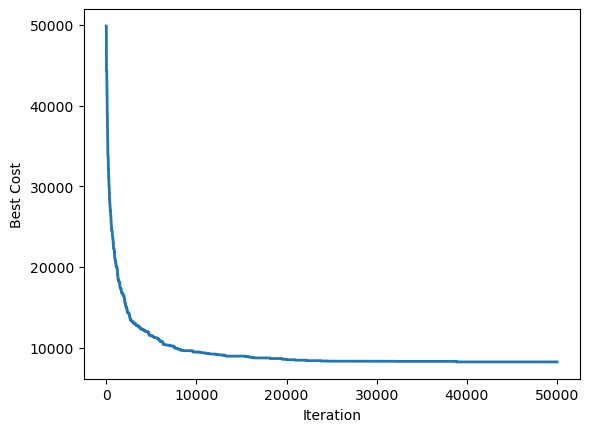

In [53]:
# Plot the result
plt.plot(BestCost_list4, linewidth = 2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

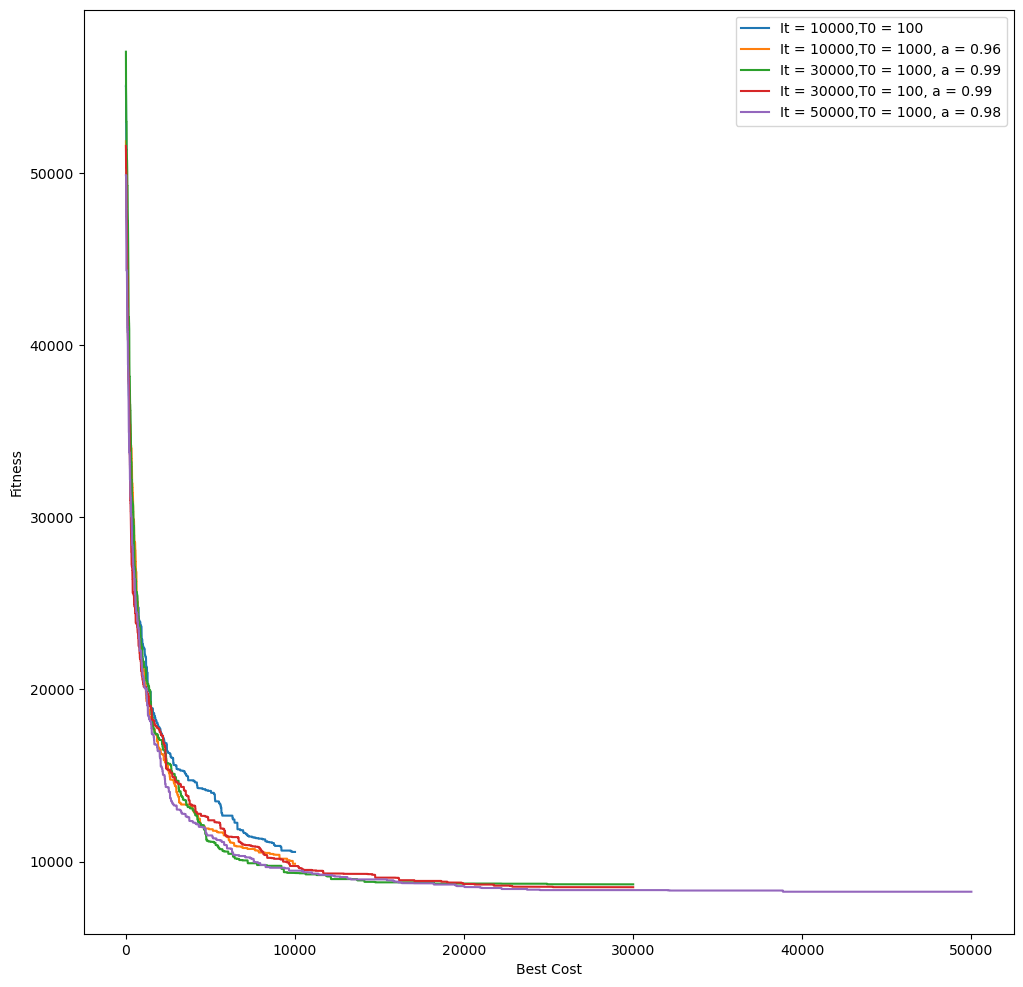

In [54]:
#Comparision

plt.figure(figsize=(12, 12))
plt.plot(BestCost_list, label = "It = 10000,T0 = 100")
plt.plot(BestCost_list1, label = "It = 10000,T0 = 1000, a = 0.96")
plt.plot(BestCost_list2, label = "It = 30000,T0 = 1000, a = 0.99")
plt.plot(BestCost_list3, label = "It = 30000,T0 = 100, a = 0.99")
plt.plot(BestCost_list4, label = "It = 50000,T0 = 1000, a = 0.98")
plt.legend()
plt.xlabel('Best Cost')
plt.ylabel('Fitness')
plt.show()

Genetic Algorithm

In [55]:
import random

def pmx(parent1, parent2):
    # Choose a random crossover point
    crossover_point = random.randint(0, len(parent1) - 2)
    child = parent1.copy()
    
    # Map the positions between the parents using the crossover point
    for i in range(crossover_point + 1, len(parent1)):
        if parent2[i] not in child[:crossover_point + 1]:
            temp_index = i
            while parent1[temp_index] in parent2[crossover_point + 1:i]:
                temp_index = parent2.index(parent1[temp_index])
            child[temp_index] = parent2[i]
            
    for i in range(crossover_point + 1):
        if parent2[i] not in child[crossover_point + 1:]:
            temp_index = i
            while parent1[temp_index] in parent2[:crossover_point + 1]:
                temp_index = parent2.index(parent1[temp_index])
            child[temp_index] = parent2[i]
    
    return child


def twoPointPmxCrossover(parent1, parent2):
    point1 = random.randint(0, len(parent1)-1)
    point2 = random.randint(point1+1, len(parent1))
    child = parent1[point1:point2]
    
    # Map the middle segment of parent2 onto the child
    for i in range(point2-point1):
        gene = parent2[point1+i]
        while gene in child:
            # If the gene is already in the child, find the corresponding
            # gene in parent2 and try again with that gene
            index = parent1.index(gene)
            gene = parent2[index]
        child.append(gene)

    for i in range(len(parent2)):
        if parent2[i] not in child:
            child.append(parent2[i])
    
    return child

def crossover():
    crossover_func = [pmx, twoPointPmxCrossover]
    prob = [0.1, 0.9] 
    idx = rouletteWheelSelection(prob)
    return crossover_func[idx]


import random

"""def tournamentSelection(population,fitness, k):
    tournament = random.sample(population, k)
    winner = min(tournament, key=lambda x: x.fitness)
    return winner"""

def tournamentSelection(population, fitness, tournamentSize):
    tournament = random.sample(range(len(population)), tournamentSize)
    fittest = tournament[0]
    for i in tournament[1:]:
        if fitness[i] < fitness[fittest]:
            fittest = i
    return population[fittest]



In [66]:
import random

def single_point_pmx_crossover(parent1, parent2):
    assert len(parent1) == len(parent2), "Parents must have the same length"
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1.copy()
    crossover_value = parent2[crossover_point]
    index_of_crossover_value_in_parent1 = parent1.index(crossover_value)
    child[crossover_point], child[index_of_crossover_value_in_parent1] = child[index_of_crossover_value_in_parent1], child[crossover_point]
    return child


def two_point_pmx_crossover(parent1, parent2):
    assert len(parent1) == len(parent2), "Parents must have the same length"
    crossover_point1, crossover_point2 = sorted(random.sample(range(len(parent1)), 2))
    child = parent1.copy()
    for i in range(crossover_point1, crossover_point2):
        crossover_value = parent2[i]
        index_of_crossover_value_in_parent1 = parent1.index(crossover_value)
        child[i], child[index_of_crossover_value_in_parent1] = child[index_of_crossover_value_in_parent1], child[i]
    return child


def select_crossover_operator():

    crossover_operators = [single_point_pmx_crossover, two_point_pmx_crossover]
    probability_distribution = [0.1, 0.9]
    selected_crossover_operator_index = rouletteWheelSelection(probability_distribution)
    return crossover_operators[selected_crossover_operator_index]


def tournamentSelection(population, fitness, tournamentSize):
    tournament = random.sample(range(len(population)), tournamentSize)
    fittest = tournament[0]
    for i in tournament[1:]:
        if fitness[i] < fitness[fittest]:
            fittest = i
    return population[fittest]

In [71]:
def geneticAlgorithm(model, popSize, numGenerations, crossoverRate, mutationRate, k):
    population = []
    for i in range(popSize):
        solution = createRandomSolution(model)
        population.append(solution)
    
    bestCost = float('inf')
    bestSolution = []
    costs = []
    
    for gen in range(numGenerations):
        newPopulation = []
        populationFitness = [TourLength(sol, model) for sol in population]
        
        for i in range(popSize):
            parent1 = tournamentSelection(population, populationFitness, k)
            parent2 = tournamentSelection(population, populationFitness, k)

            if random.random() < crossoverRate:
                crossover = select_crossover_operator()
                child = crossover(parent1, parent2)
            else:
                child = population[i]

            if random.random() < mutationRate:
                mutationMethod = rouletteWheelSelection([0.33, 0.33, 0.34])

                if mutationMethod == 0:
                    child = ApplySwap(child)
                elif mutationMethod == 1:
                    child = ApplyReversion(child)
                else:
                    child = ApplyInsertion(child)
            
            newPopulation.append(child)
        # Merge the original population and offspring
        mergedPopulation = population + newPopulation
        random.shuffle(mergedPopulation)
        population = mergedPopulation[:popSize]
        populationFitness = [TourLength(sol, model) for sol in population]
        bestIndex = populationFitness.index(min(populationFitness))
        if populationFitness[bestIndex] < bestCost:
            bestCost = populationFitness[bestIndex]
            bestSolution = population[bestIndex]
        
        costs.append(bestCost)
        if gen % 1000 == 0:
            print(f"Iteration {gen}: Best cost = {bestCost}")
    print(f"Iteration {numGenerations}: Best cost = {bestCost}")
    
    return costs, bestSolution


model = tsp()
popSize = 50
numGenerations = 10000
cr = 0.9  #crossoverRate
mr = 0.9  #mutationRate
k = 50    #tournament size
bestCost1, bestSolution = geneticAlgorithm(model, popSize, numGenerations,cr,mr,k)

Iteration 0: Best cost = 46571.82133840641
Iteration 1000: Best cost = 9163.35034422023
Iteration 2000: Best cost = 8283.182632092181
Iteration 3000: Best cost = 8207.985404475045
Iteration 4000: Best cost = 8141.313022122993
Iteration 5000: Best cost = 8141.313022122993
Iteration 6000: Best cost = 8141.313022122993
Iteration 7000: Best cost = 8141.313022122993
Iteration 8000: Best cost = 8141.313022122993
Iteration 9000: Best cost = 8124.561315947003
Iteration 10000: Best cost = 8124.561315947003


Text(0, 0.5, 'Best Cost')

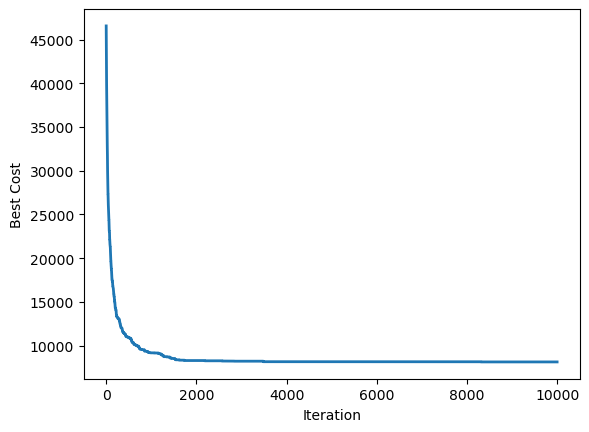

In [72]:
# Plot the result
plt.plot(bestCost1, linewidth = 2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

Iteration 0: Best cost = 44860.33000159768
Iteration 1000: Best cost = 8259.806823441862
Iteration 2000: Best cost = 8259.806823441862
Iteration 3000: Best cost = 8259.806823441862
Iteration 4000: Best cost = 8259.806823441862
Iteration 5000: Best cost = 8259.806823441862
Iteration 6000: Best cost = 8259.806823441862
Iteration 7000: Best cost = 8259.806823441862
Iteration 8000: Best cost = 8259.806823441862
Iteration 9000: Best cost = 8259.806823441862
Iteration 10000: Best cost = 8259.806823441862
Iteration 11000: Best cost = 8259.806823441862
Iteration 12000: Best cost = 8259.806823441862
Iteration 13000: Best cost = 8259.806823441862
Iteration 14000: Best cost = 8259.806823441862
Iteration 15000: Best cost = 8259.806823441862
Iteration 16000: Best cost = 8259.806823441862
Iteration 17000: Best cost = 8259.806823441862
Iteration 18000: Best cost = 8259.806823441862
Iteration 19000: Best cost = 8259.806823441862
Iteration 20000: Best cost = 8259.806823441862
Iteration 21000: Best cost

Text(0, 0.5, 'Best Cost')

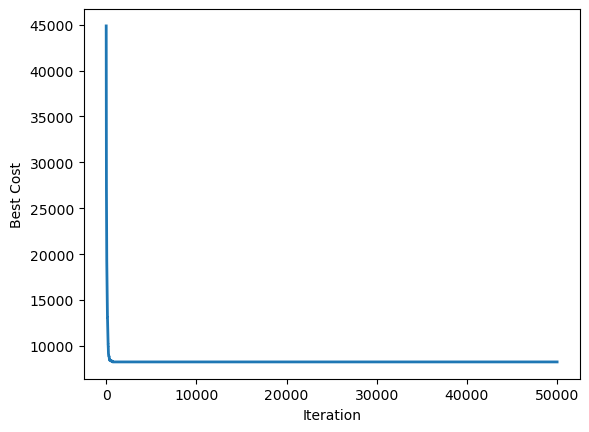

In [69]:
model = tsp()
popSize = 500
numGenerations = 50000
cr = 0.9  #crossoverRate
mr = 0.6  #mutationRate
k = 50    #tournament size
bestCost, bestSolution = geneticAlgorithm(model, popSize, numGenerations,cr,mr,k)

# Plot the result
plt.plot(bestCost, linewidth = 2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

Iteration 0: Best cost = 47633.94965278055
Iteration 1000: Best cost = 9442.586454220691
Iteration 2000: Best cost = 8439.52772157346
Iteration 3000: Best cost = 8333.382713874007
Iteration 4000: Best cost = 8290.846208411547
Iteration 5000: Best cost = 8282.510514945205
Iteration 6000: Best cost = 8276.286033653238
Iteration 7000: Best cost = 8276.286033653238
Iteration 8000: Best cost = 8276.286033653238
Iteration 9000: Best cost = 8276.286033653238
Iteration 10000: Best cost = 8276.286033653238
Iteration 11000: Best cost = 8276.286033653238
Iteration 12000: Best cost = 8276.286033653238
Iteration 13000: Best cost = 8276.286033653238
Iteration 14000: Best cost = 8276.286033653238
Iteration 15000: Best cost = 8276.286033653238
Iteration 16000: Best cost = 8276.286033653238
Iteration 17000: Best cost = 8276.286033653238
Iteration 18000: Best cost = 8276.286033653238
Iteration 19000: Best cost = 8276.286033653238
Iteration 20000: Best cost = 8276.286033653238
Iteration 21000: Best cost 

Text(0, 0.5, 'Best Cost')

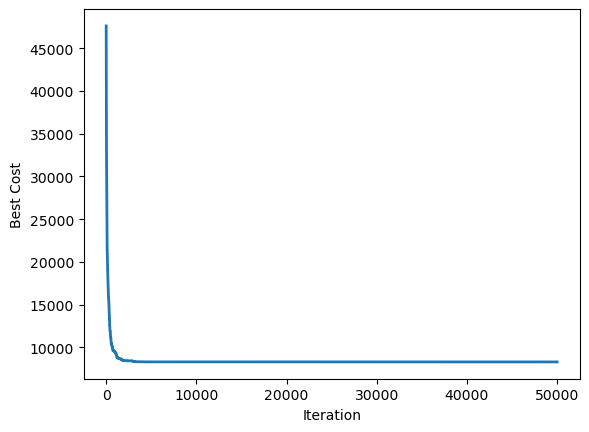

In [73]:
model = tsp()
popSize = 50
numGenerations = 50000
cr = 0.9  #crossoverRate
mr = 0.6  #mutationRate
k = 50    #tournament size
bestCost2, bestSolution = geneticAlgorithm(model, popSize, numGenerations,cr,mr,k)

# Plot the result
plt.plot(bestCost2, linewidth = 2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

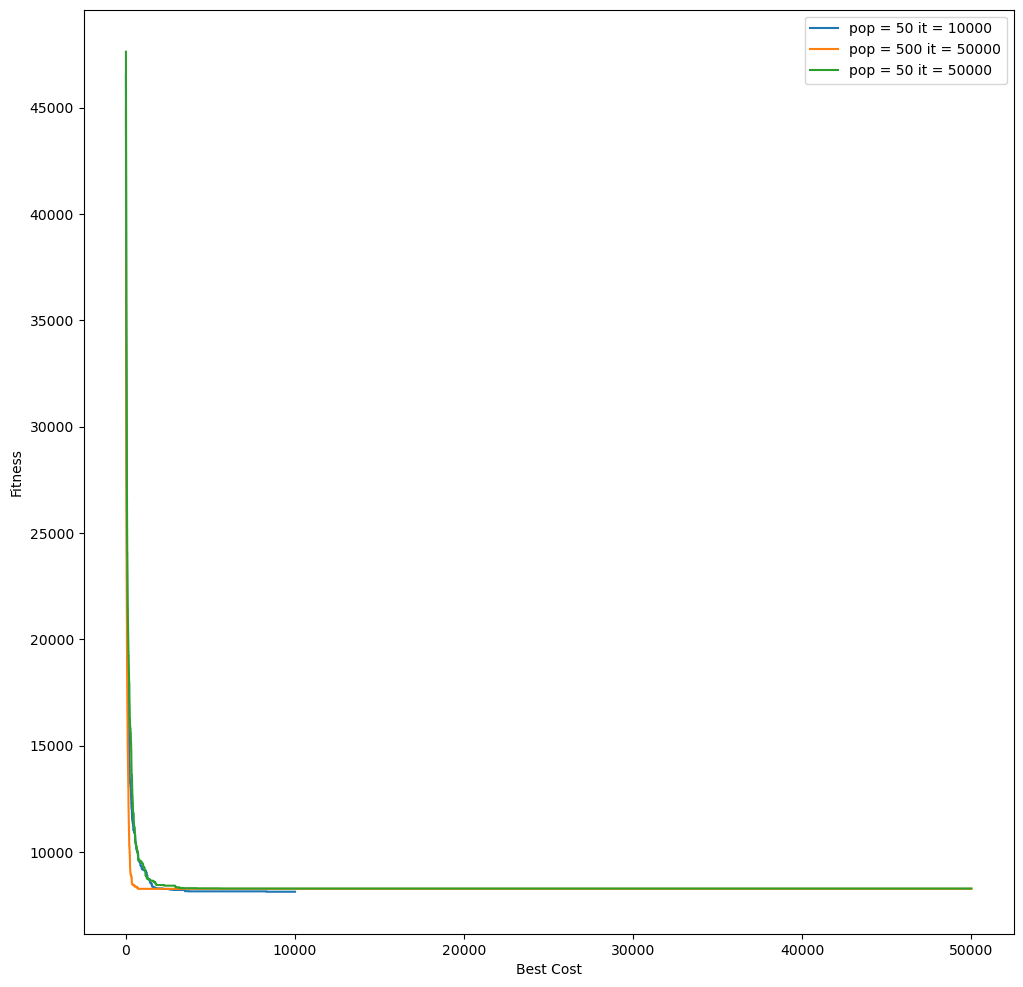

In [74]:
# Comparision
plt.figure(figsize=(12, 12))
plt.plot(bestCost1, label='pop = 50 it = 10000')
plt.plot(bestCost, label='pop = 500 it = 50000')
plt.plot(bestCost2, label='pop = 50 it = 50000')

plt.legend()
plt.xlabel('Best Cost')
plt.ylabel('Fitness')
plt.show()

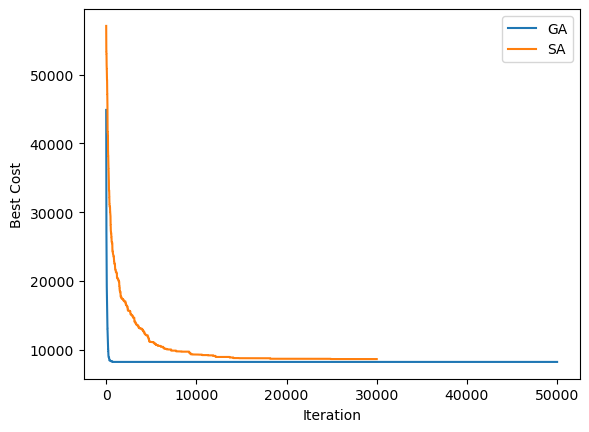

In [75]:
# Plotting the best fitness values
plt.plot(bestCost, label='GA')
plt.plot(BestCost_list2, label='SA')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.show()

Results and Conclusion

Time complexity and execution time of SA is much faster than GA.
There is a drastric rate of convergence in GA compared to SA.
The overall results of SA are better than GA, however it can be optimized by using the right value for its parameters and selection method.